In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
from ctd.comparison.analysis.external.ext import Analysis_Ext
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison
import torch
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:
HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)
slds_path = "/home/csverst/Github/CtDBenchmark/sldsV2/"

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240503_Fig1_NBFF_NoisyGRU/max_epochs=500 n_samples=1000 latent_size=64 seed=0 learning_rate=0.001/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)

path_GRU_Sweep = pathTT + "20240503_Fig1_NBFF_GRU_TT_GRU_Sweep/"
subfolders_GRU = [f.path for f in os.scandir(path_GRU_Sweep) if f.is_dir()]

for subfolder in subfolders_GRU:
    subfolder = subfolder + "/"
    analysis_GRU = Analysis_DT(run_name = "GRU", filepath = subfolder, model_type = "SAE")

slds3_1 = Analysis_Ext(run_name = "SLDS3_1", filepath = slds_path + "slds_3bff_v2_3_Run1.h5")
slds3_2 = Analysis_Ext(run_name = "SLDS3_3", filepath = slds_path + "slds_3bff_v2_3_Run2.h5")
slds3_3 = Analysis_Ext(run_name = "SLDS3_4", filepath = slds_path + "slds_3bff_v2_3_Run3.h5")
slds3_4 = Analysis_Ext(run_name = "SLDS3_4", filepath = slds_path + "slds_3bff_v2_3_Run4.h5")
slds3_5 = Analysis_Ext(run_name = "SLDS3_5", filepath = slds_path + "slds_3bff_v2_3_Run5.h5")
slds8_1 = Analysis_Ext(run_name = "SLDS8_1", filepath = slds_path + "slds_3bff_v2_8_Run1.h5")
slds8_2 = Analysis_Ext(run_name = "SLDS8_2", filepath = slds_path + "slds_3bff_v2_8_Run2.h5")
slds8_3 = Analysis_Ext(run_name = "SLDS8_3", filepath = slds_path + "slds_3bff_v2_8_Run3.h5")
slds8_4 = Analysis_Ext(run_name = "SLDS8_4", filepath = slds_path + "slds_3bff_v2_8_Run4.h5")
slds8_5 = Analysis_Ext(run_name = "SLDS8_5", filepath = slds_path + "slds_3bff_v2_8_Run5.h5")

/home/csverst/Github/CtDBenchmark/
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'fixed_points', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'fixed_points', 'train_latents', 'train_rates']>
<KeysViewHDF5 ['eval_latents', 'eval_rates', 'fixed_points', 'train_latents', 'train_rates']>


In [3]:
comparison = Comparison(comparison_tag="Figure2NBFF_TTGRU_SLDS")

train_true_rates = analysis_GRU.get_true_rates(phase = 'train')
eval_true_rates = analysis_GRU.get_true_rates(phase = 'val')

slds3_1.add_true_rates(train_true_rates, eval_true_rates)
slds3_2.add_true_rates(train_true_rates, eval_true_rates)
slds3_3.add_true_rates(train_true_rates, eval_true_rates)
slds3_4.add_true_rates(train_true_rates, eval_true_rates)
slds3_5.add_true_rates(train_true_rates, eval_true_rates)
slds8_1.add_true_rates(train_true_rates, eval_true_rates)
slds8_2.add_true_rates(train_true_rates, eval_true_rates)
slds8_3.add_true_rates(train_true_rates, eval_true_rates)
slds8_4.add_true_rates(train_true_rates, eval_true_rates)
slds8_5.add_true_rates(train_true_rates, eval_true_rates)


comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison.load_analysis(slds3_1, group = "SLDS3")
comparison.load_analysis(slds3_2, group = "SLDS3")
comparison.load_analysis(slds3_3, group = "SLDS3")
comparison.load_analysis(slds3_4, group = "SLDS3")
comparison.load_analysis(slds3_5, group = "SLDS3")
comparison.load_analysis(slds8_1, group = "SLDS8")
comparison.load_analysis(slds8_2, group = "SLDS8")
comparison.load_analysis(slds8_3, group = "SLDS8")
comparison.load_analysis(slds8_4, group = "SLDS8")
comparison.load_analysis(slds8_5, group = "SLDS8")

comparison.load_analysis(analysis=analysis_GRU, group = "GRU")

comparison.regroup()

Working on 1 of 12: GRU
Group: GRU
Rate R2: 0.9214727389594256
State R2: 0.852879463310795
Working on 2 of 12: SLDS3_1
Group: SLDS3
Rate R2: 0.6955704142546523
State R2: 0.8996342111500882
Working on 3 of 12: SLDS3_3
Group: SLDS3
Rate R2: 0.696437521689255
State R2: 0.8954563956372283
Working on 4 of 12: SLDS3_4
Group: SLDS3
Rate R2: 0.6709508588041747
State R2: 0.8713701553052373
Working on 5 of 12: SLDS3_4
Group: SLDS3
Rate R2: 0.7141790091094458
State R2: 0.9221966890288359
Working on 6 of 12: SLDS3_5
Group: SLDS3
Rate R2: 0.6632380692306029
State R2: 0.858381510047792
Working on 7 of 12: SLDS8_1
Group: SLDS8
Rate R2: 0.7085583219643509
State R2: 0.9193397923109495
Working on 8 of 12: SLDS8_2
Group: SLDS8
Rate R2: 0.7150821268820028
State R2: 0.9220336952613177
Working on 9 of 12: SLDS8_3
Group: SLDS8
Rate R2: 0.7216856629557014
State R2: 0.9298758073585018
Working on 10 of 12: SLDS8_4
Group: SLDS8
Rate R2: 0.7230928057281267
State R2: 0.9289508307377312
Working on 11 of 12: SLDS8_5

array([[0.92147274, 0.85287946],
       [0.69557041, 0.89963421],
       [0.69643752, 0.8954564 ],
       [0.67095086, 0.87137016],
       [0.71417901, 0.92219669],
       [0.66323807, 0.85838151],
       [0.70855832, 0.91933979],
       [0.71508213, 0.9220337 ],
       [0.72168566, 0.92987581],
       [0.72309281, 0.92895083],
       [0.72287778, 0.93269998],
       [0.        , 0.        ]])

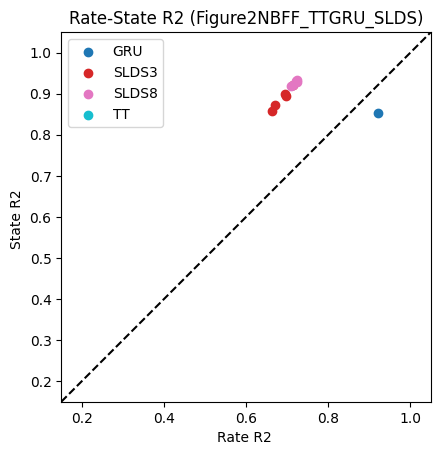

In [4]:
plot_dict = {
    "save_pdf": True,
    "ax_lim": [0.15, 1.05],
    "marker": "o",
}
comparison.compare_rate_state_r2(plot_dict = plot_dict)

In [5]:
rates3 = slds3.get_rates(phase = 'val')
rates5 = slds5.get_rates(phase = 'val')
rates8 = slds8.get_rates(phase = 'val')
rates12 = slds12.get_rates(phase = 'val')
rates16 = slds16.get_rates(phase = 'val')
true_rates = slds3.get_true_rates(phase = 'val')

gru_rates = analysis_GRU.get_rates(phase = 'val').detach().cpu().numpy()

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
trial = 0
neuron = 0
ax.plot(rates3[trial,:,neuron], label = "SLDS3")
ax.plot(rates5[trial,:,neuron], label = "SLDS5")
ax.plot(rates8[trial,:,neuron], label = "SLDS8")
ax.plot(rates12[trial,:,neuron], label = "SLDS12")
ax.plot(rates16[trial,:,neuron], label = "SLDS16")
ax.plot(gru_rates[trial,:,neuron], label = "GRU")
ax.plot(true_rates[trial,:,neuron], label = "True")
ax.legend()

NameError: name 'slds3' is not defined